# 1 準備

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
# データ作成に使用するライブラリ
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
# モデル作成に使用するライブラリ
import torch
import torch.nn as nn
import torch.optim as optim
# モデルの可視化に使用するライブラリ
import matplotlib.pyplot as plt
torch.manual_seed(10)

In [ ]:
# データセットの作成
transform = transforms.Compose([transforms.ToTensor(), lambda x: x.view(-1)])
root = './data'
mnist_dataset = datasets.MNIST(root=root,download=True,train=True,transform=transform)
dataloader = DataLoader(mnist_dataset, batch_size=100,shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# gpuの指定
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

# 2 モデル

In [ ]:
class AE(nn.Module):

    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(784, 256)
        self.l2 = nn.Linear(256, 784)

    def forward(self, x):
        x = self.l1(x)
        z = torch.relu(x)

        z = self.l2(z)
        y = torch.sigmoid(z)

        return y

In [ ]:
model = AE().to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())

# 3 モデルの学習

In [ ]:
n_epoch = 10
for epoch in range(n_epoch):

    loss_mean = 0.
    for (x, t) in dataloader:

      # 学習準備
      x = x.to(device)
      model.train()
      
      # モデルの学習
      x_fake = model(x)
      loss = criterion(x_fake, x)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      
      # 損失関数の計算
      loss_mean += loss.item()
    loss_mean /= len(dataloader)
    
    print('Epoch: {}, Loss: {:.3f}'.format(epoch+1, loss_mean))

Epoch: 1, Loss: 0.145
Epoch: 2, Loss: 0.082
Epoch: 3, Loss: 0.073
Epoch: 4, Loss: 0.069
Epoch: 5, Loss: 0.068
Epoch: 6, Loss: 0.067
Epoch: 7, Loss: 0.066
Epoch: 8, Loss: 0.066
Epoch: 9, Loss: 0.066
Epoch: 10, Loss: 0.065


# 4 画像の生成

(-0.5, 27.5, 27.5, -0.5)

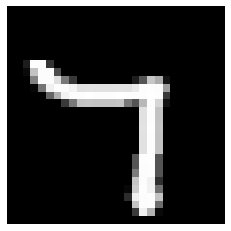

In [ ]:
# 元データの可視化
x, t = next(iter(dataloader))
real_image = x[0,].view(28,28).detach().numpy()
plt.imshow(real_image, cmap='binary_r')
plt.axis('off')

(-0.5, 27.5, 27.5, -0.5)

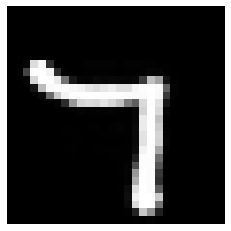

In [ ]:
# 生成データの可視化
model.eval()
x = x.to(device)
fake_image = model(x)[0,].view(28,28).detach().cpu().numpy()
plt.imshow(fake_image, cmap='binary_r')
plt.axis('off')